# Example of how to analyze the stacking results

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#make plots look nicer
from matplotlib import rc
rc('font',family='DejaVu Sans',size=20)
rc('mathtext',fontset='dejavusans')
rc('figure', figsize=(1.41421356237*6.,6.)) 
rc('lines', linewidth=1.8,marker=None,markersize=8 )
rc('axes', linewidth=1.5,labelsize=19,prop_cycle=plt.cycler(color=('k','r','b','darkorange','steelblue','hotpink','gold','c','maroon','darkgreen')) )
rc(('xtick.major','ytick.major'), size=5.2,width=1.5)
rc(('xtick.minor','ytick.minor'), size=3.2,width=1.5,visible=True)
rc(('xtick','ytick'), labelsize=16, direction='in' )
rc(('xtick'), top=True,bottom=True ) # For some stupid reason you have to do these seperately
rc(('ytick'), left=True
   ,right=True )
rc('legend',numpoints=1,scatterpoints=1,labelspacing=0.2,fontsize=18,fancybox=True,handlelength=1.5,
            handletextpad=0.5)
rc('savefig', dpi=150,format='pdf',bbox='tight' )
rc('errorbar',capsize=3.)

# Import the Database & Stacking Result

In [7]:
#the structure
struct = np.load('./../PyStructure/Output/ngc5194_data_struct_2020_08_11.npy',allow_pickle = True).item()

#the staced spectra
stacks = np.load('./../Stacking/Example/Example_Results/NGC6946_stack_12co21.npy',allow_pickle = True).item()

# Have a look at the different stacked spectra 

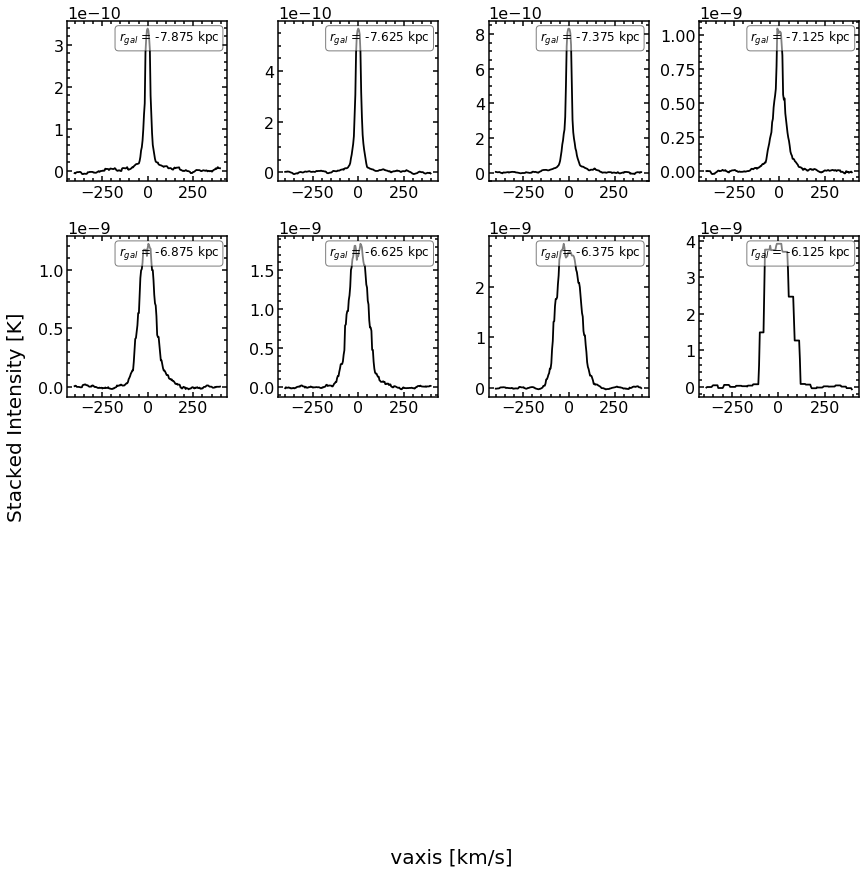

In [8]:
fig=plt.figure(figsize=(12,12))
vaxis = stacks["vaxis_kms"]
for i in range(len(stacks["xmid"])):
    ax = plt.subplot(4,4,i+1)
    ax.plot(vaxis,stacks["12CO21_spec_K"][:,i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    ax.text(0.95, 0.95, r"$r_{gal}$"+" = {} kpc".format(stacks["xmid"][i]), transform=ax.transAxes, fontsize=12,
    verticalalignment='top',horizontalalignment='right', bbox=props)
    
fig.text(0.5,-0.01, r' vaxis [km/s]', ha="center", va="center", fontsize = 20)
fig.text(0,0.5, r'Stacked Intensity [K]', ha="center", va="center", rotation=90, fontsize = 20)
plt.tight_layout()

# Check over which range it integrates

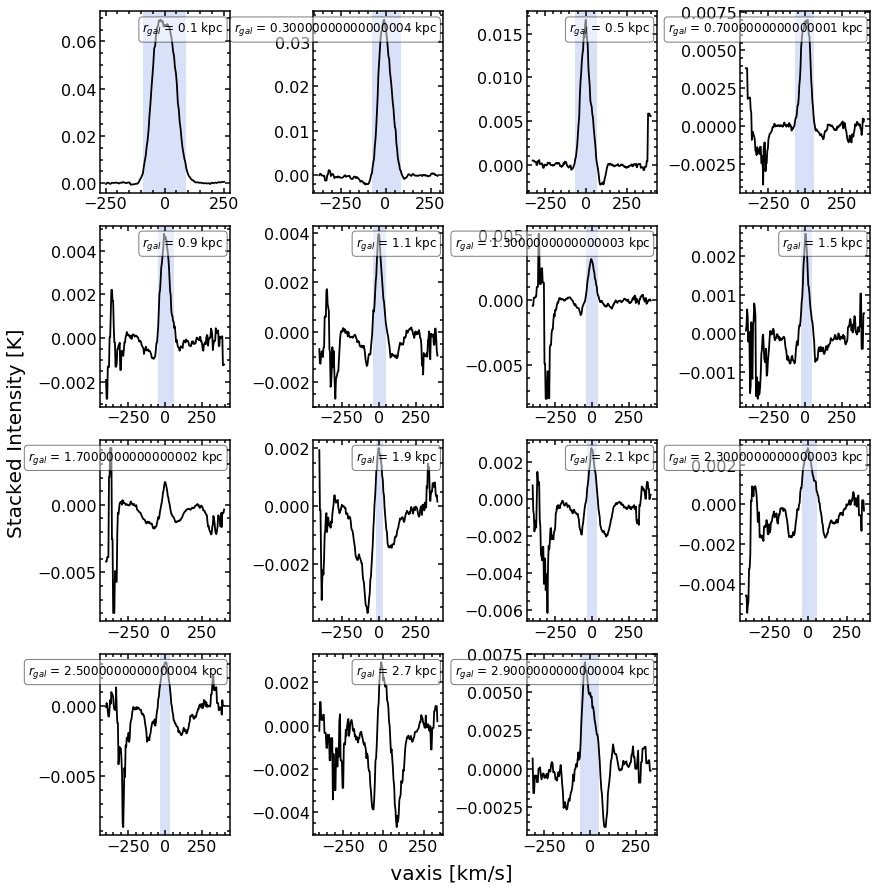

In [30]:
fig=plt.figure(figsize=(12,12))

for i in range(len(stacks["xmid"])):
    ax = plt.subplot(4,4,i+1)
    ax.plot(vaxis,stacks["CO10_spec_K"][:,i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    ax.text(0.95, 0.95, r"$r_{gal}$"+" = {} kpc".format(stacks["xmid"][i]), transform=ax.transAxes, fontsize=12,
    verticalalignment='top',horizontalalignment='right', bbox=props)
    
    if len(np.where(stacks["prior_mask"][:,i]==1)[0])>0:
        v0 = vaxis[np.where(stacks["prior_mask"][:,i]==1)][0]
        v1 = vaxis[np.where(stacks["prior_mask"][:,i]==1)][-1]
        ax.axvspan(v0, v1, facecolor='royalblue', alpha=0.2)
fig.text(0.5,-0.01, r' vaxis [km/s]', ha="center", va="center", fontsize = 20)
fig.text(0,0.5, r'Stacked Intensity [K]', ha="center", va="center", rotation=90, fontsize = 20)
plt.tight_layout()

# Plot the Stacked Intensities

In [77]:
#get the distance to the center of every point
rgal_kpc = struct["rgal_kpc"]

#get the intensities and uncertainties in co21 (needed for S/N determination)
int_co21 = struct["INT_VAL_12CO21"]
uc_co21 = struct["INT_UC_12CO21"]

#determine the S/N of every datapoint
SN_co21 = int_co21/uc_co21

#points with significant detection (S/N>3)
idx_detect = np.where(SN_co21>3)
idx_non_detect = np.where(SN_co21<=3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


Text(0, 0.5, 'Integrated CO(2-1) Int. [K km/s]')

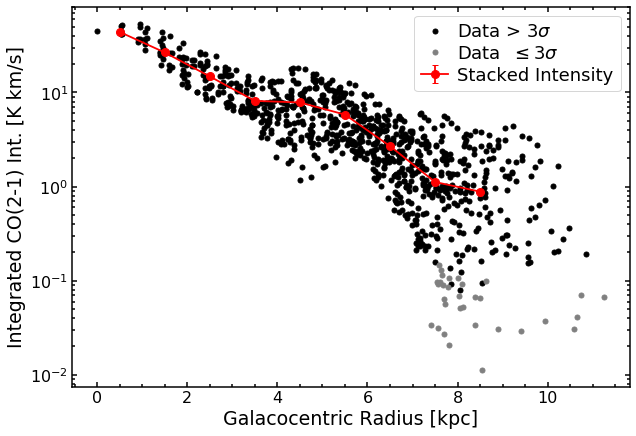

In [79]:
plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)

#plot the detections
ax.plot(rgal_kpc[idx_detect],int_co21[idx_detect],"o", label = r"Data > 3$\sigma$", ms=5)

#plot the nondetections
ax.plot(rgal_kpc[idx_non_detect],int_co21[idx_non_detect],"o", ms=5,c = "grey", label = r"Data  $\leq 3\sigma$")
ax.errorbar(stacks["xmid"],stacks["ii_K_kms_12CO21"],yerr = stacks["uc_ii_K_kms_12CO21"],fmt="o-",color = "red", label="Stacked Intensity")
ax.set_yscale("log")
ax.legend()

ax.set_xlabel("Galacocentric Radius [kpc]")
ax.set_ylabel("Integrated CO(2-1) Int. [K km/s]")